In [ ]:
# !pip install torchdata
# !pip install torchtext
# !pip install pandas_profiling

In [ ]:
!gdown --id 1tUUccWpQeWxiKG4r9i-s48H6eR42dG1g

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1tUUccWpQeWxiKG4r9i-s48H6eR42dG1g
To: /content/training.1600000.processed.noemoticon.csv
100% 239M/239M [00:01<00:00, 206MB/s]


In [ ]:
!gdown --id 16AUVCmxxrYyNA-aZA-8xjLCaTsbTdlT3

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=16AUVCmxxrYyNA-aZA-8xjLCaTsbTdlT3
To: /content/train-v2.0.json
100% 42.1M/42.1M [00:00<00:00, 185MB/s]


# Data Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from tqdm.notebook  import tqdm_notebook
tqdm_notebook.pandas()

from dateutil.parser import parse
from collections import Counter

from nltk.tokenize import TweetTokenizer, TreebankWordTokenizer
from torchtext.datasets import SST2
from torch.utils.data import DataLoader

In [ ]:
path = ""

In this notebook we'll look at the datasets that we will use in this project. 

## Sentiment140

### Data Loading

The first dataset is the sentiment140 dataset that links tweets to a measure of the sentiment they express. 

In [ ]:
sentiment140 = pd.read_csv(path+"training.1600000.processed.noemoticon.csv",encoding="latin-1",header=None)

In [ ]:
sentiment140 = sentiment140.drop(3,axis=1)
sentiment140 = sentiment140.set_index(1)
sentiment140.columns = ["target","date","user","text"]
sentiment140.index.name = "ids"
sentiment140 = sentiment140.sort_index()

In [ ]:
# set(sentiment140.target) 

In [ ]:
sentiment140 = sentiment140[~sentiment140.index.duplicated()]
sentiment140 = sentiment140[~sentiment140.text.duplicated()]

In [ ]:
sentiment140.head()

,target,date,user,text
ids,,,,
1467810369,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1467810672,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1467810917,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
1467811184,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
1467811193,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
sentiment140.shape

(1581466, 4)

### Analysis

In [ ]:
uniques = len(sentiment140.index.unique())
print("They are {} unique articles in the database".format(uniques))

They are 1581466 unique articles in the database


In [ ]:
averageLength = sentiment140.text.apply(len).mean()
stdLength = sentiment140.text.apply(len).std()
print("Now let's consider the length (in characters) of the texts : ")
print("The average length is {}".format(round(averageLength,2)))
print("Its standard deviation is {}".format(round(stdLength,2)))

Now let's consider the length (in characters) of the texts : 
The average length is 74.48
Its standard deviation is 36.21


[]

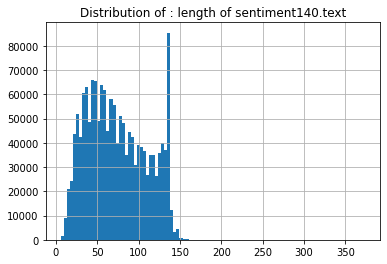

In [ ]:
plt.figure()
plt.title("Distribution of : {0}".format("length of sentiment140.text"))
sentiment140.text.apply(len).hist(bins=100)
plt.plot()

In [ ]:
print("Now let's look at the size of the samples that we have for each sentiment : ")
sentiment140.groupby(sentiment140.target).size()

Now let's look at the size of the samples that we have for each sentiment : 


target
0    788998
4    792468
dtype: int64

Now instead of considering the length in character let's break our texts in "words"(separated by spaces) and count those instead

In [ ]:
sentiment140['text_len'] = sentiment140.text.progress_map(lambda x: len(x.split(' '))) 

  0%|          | 0/1581466 [00:00<?, ?it/s]

In [ ]:
# sentiment140.date = sentiment140["date"].progress_map(lambda date : parse(date,ignoretz=True))

In [ ]:
averageLength = sentiment140.text_len.mean()
stdLength = sentiment140["text_len"].std()
print("The average length is {} words".format(round(averageLength,2)))
print("The standard deviation is {} words".format(round(stdLength,2)))

The average length is 14.45 words
The standard deviation is 7.03 words


[]

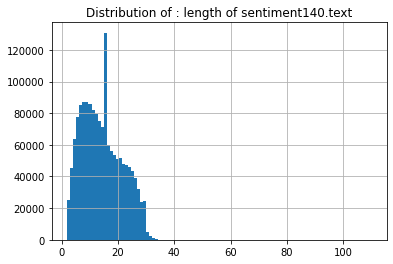

In [ ]:
plt.figure()
plt.title("Distribution of : {0}".format("length of sentiment140.text"))
sentiment140.text_len.hist(bins=100)
plt.plot()

#### Zipf's Law

Now let's check that zipf's law aso applies to our dataset

  0%|          | 0/1 [00:00<?, ?it/s]

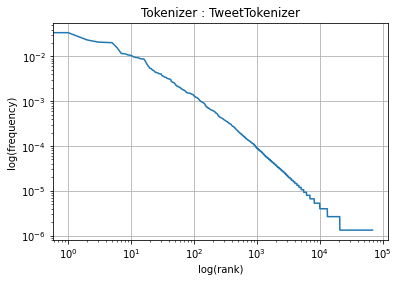

In [ ]:
tokenizers = [TweetTokenizer()]


for tok in tqdm(tokenizers):
  arr = sentiment140[0:50000].text.apply(lambda x: tok.tokenize(x)).array
  arr = [ x for X in arr for x in X]
  
  c = Counter(arr)

  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(type(tok).__name__))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

## SST2

### Data Loading

The second dataset we'll use is the Stanford Sentiment Treebank dataset that links movie reviews to a label that gives a measure of the sentiment they express. 

In [ ]:
dataSet = SST2(root=".data",split='train')
texts = []
labels = []

for tuple in dataSet.datapipe : 

    texts.append(tuple[0])
    labels.append(tuple[1])

dfSST2 = pd.DataFrame([texts,labels]).T
dfSST2.columns = ["text","label"]


In [ ]:
# To get rid of duplicates
dfSST2 = dfSST2[~dfSST2.text.duplicated()]

### Analysis

In [ ]:
dfSST2.head()

,text,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1
3,remains utterly satisfied to remain the same t...,0
4,on the worst revenge-of-the-nerds clichés the ...,0


In [ ]:
dfSST2.shape

(66978, 2)

In [ ]:
uniques = len(dfSST2.index.unique())
print("They are {} unique articles in the database".format(uniques))

They are 66978 unique articles in the database


In [ ]:
averageLength = dfSST2.text.apply(len).mean()
stdLength = dfSST2.text.apply(len).std()
print("Now let's consider the length (in characters) of the texts : ")
print("The average length is {}".format(round(averageLength,2)))
print("Its standard deviation is {}".format(round(stdLength,2)))

Now let's consider the length (in characters) of the texts : 
The average length is 53.75
Its standard deviation is 43.41


[]

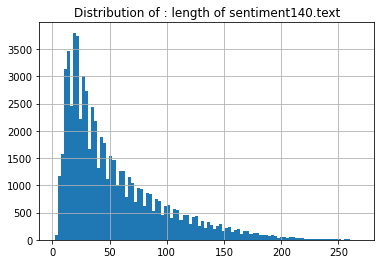

In [ ]:
plt.figure()
plt.title("Distribution of : {0}".format("length of sentiment140.text"))
dfSST2.text.apply(len).hist(bins=100)
plt.plot()

In [ ]:
print("Now let's look at the size of the samples that we have for each sentiment : ")
dfSST2.groupby(dfSST2.label).size()

Now let's look at the size of the samples that we have for each sentiment : 


label
0    29647
1    37331
dtype: int64

Now instead of considering the length in character let's break our texts in "words"(separated by spaces) and count those instead

In [ ]:
dfSST2['text_len'] = dfSST2.text.apply(lambda x: len(x.split(' ')))

In [ ]:
averageLength = dfSST2.text_len.mean()
stdLength = dfSST2["text_len"].std()
print("The average length is {} words".format(round(averageLength,2)))
print("The standard deviation is {} words".format(round(stdLength,2)))

The average length is 10.45 words
The standard deviation is 8.07 words


[]

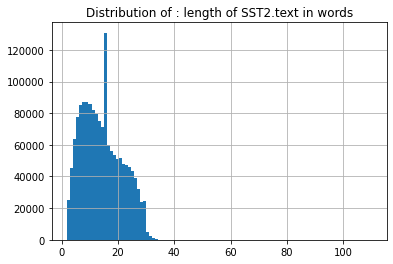

In [ ]:
plt.figure()
plt.title("Distribution of : {0}".format("length of SST2.text in words"))
sentiment140.text_len.hist(bins=100)
plt.plot()

#### Profile Report

Now let's do a general profile report on our database

In [ ]:
from pandas_profiling import ProfileReport


In [ ]:
ProfileReport(dfSST2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Zipf's Law

Now let's check that zipf's law aso applies to our dataset

  0%|          | 0/1 [00:00<?, ?it/s]

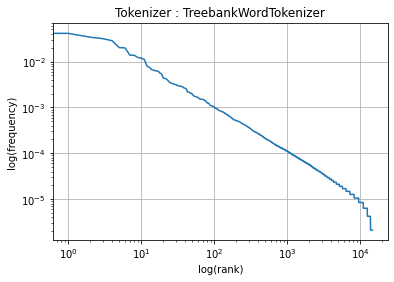

In [ ]:
tokenizers = [TreebankWordTokenizer()]


for tok in tqdm(tokenizers):
  arr = dfSST2[0:50000].text.apply(lambda x: tok.tokenize(x)).array
  arr = [ x for X in arr for x in X]
  
  c = Counter(arr)

  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(type(tok).__name__))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

## Sqavd V.2

### Data Loading

The last one is "The Stanford Question Answering Dataset" that permits to test the ability of a system to answer reading comprehension questions. 

In [ ]:
squadv2 = pd.read_json(path+"train-v2.0.json")
squadv2 = squadv2.drop("version",axis=1)

In [ ]:
titles = []
other = []
contexts = []

for data in tqdm_notebook(squadv2["data"]): 
    title = data["title"]
    paragraphs = data["paragraphs"]
    for paragraph in paragraphs : 
        titles.append(title)
        other.append(paragraph["qas"])
        contexts.append(paragraph["context"])


squadv2 = pd.DataFrame({"title":titles,"quas":other,"context":contexts})

  0%|          | 0/442 [00:00<?, ?it/s]

In [ ]:
# Getting rid of the duplicates
squadv2 = squadv2[~squadv2.context.duplicated()]

### Analysis

In [ ]:
squadv2.head()

,title,quas,context
0,Beyoncé,[{'question': 'When did Beyonce start becoming...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
1,Beyoncé,"[{'question': 'After her second solo album, wh...",Following the disbandment of Destiny's Child i...
2,Beyoncé,"[{'question': 'In her music, what are some rec...","A self-described ""modern-day feminist"", Beyonc..."
3,Beyoncé,[{'question': 'Beyonce's younger sibling also ...,"Beyoncé Giselle Knowles was born in Houston, T..."
4,Beyoncé,[{'question': 'What town did Beyonce go to sch...,Beyoncé attended St. Mary's Elementary School ...


In [ ]:
squadv2.shape

(19029, 3)

In [ ]:
uniques = len(squadv2.index.unique())
print("They are {} unique articles in the database".format(uniques))

They are 19029 unique articles in the database


In [ ]:
averageLength = squadv2.context.apply(len).mean()
stdLength = squadv2.context.apply(len).std()
print("Now let's consider the length (in characters) of the texts : ")
print("The average length is {}".format(round(averageLength,2)))
print("Its standard deviation is {}".format(round(stdLength,2)))

Now let's consider the length (in characters) of the texts : 
The average length is 735.64
Its standard deviation is 309.77


[]

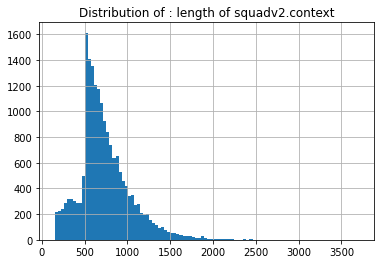

In [ ]:
plt.figure()
plt.title("Distribution of : {0}".format("length of squadv2.context"))
squadv2.context.apply(len).hist(bins=100)
plt.plot()

In [ ]:
squadv2.groupby(squadv2.title).size()

title
2008_Sichuan_earthquake             77
2008_Summer_Olympics_torch_relay    74
51st_state                          32
ASCII                               26
A_cappella                          23
                                    ..
Xbox_360                            26
Yale_University                     46
YouTube                             34
Zhejiang                            38
Zinc                                38
Length: 442, dtype: int64

Now instead of considering the length in character let's break our texts in "words"(separated by spaces) and count those instead

In [ ]:
squadv2['text_len'] = squadv2.context.apply(lambda x: len(x.split(' ')))

In [ ]:
averageLength = squadv2.text_len.mean()
stdLength = squadv2["text_len"].std()
print("The average length is {} words".format(round(averageLength,2)))
print("The standard deviation is {} words".format(round(stdLength,2)))

The average length is 116.6 words
The standard deviation is 49.67 words


[]

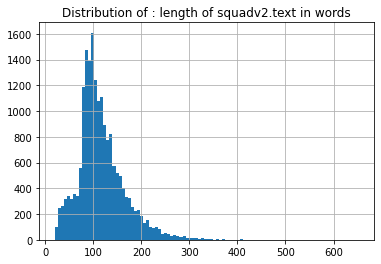

In [ ]:
plt.figure()
plt.title("Distribution of : {0}".format("length of squadv2.text in words"))
squadv2.text_len.hist(bins=100)
plt.plot()

#### Profile Report

Now let's do a general profile report on our database

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
ProfileReport(squadv2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Zipf's Law

  0%|          | 0/1 [00:00<?, ?it/s]

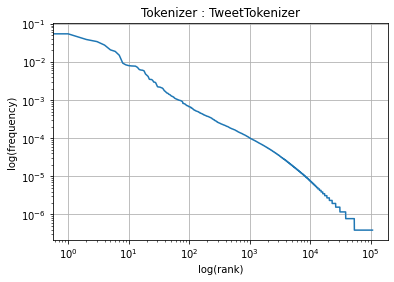

In [ ]:
tokenizers = [TweetTokenizer()]


for tok in tqdm(tokenizers):
  arr = squadv2[0:50000].context.apply(lambda x: tok.tokenize(x)).array
  arr = [ x for X in arr for x in X]
  
  c = Counter(arr)

  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(type(tok).__name__))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()